In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq

In [3]:
sample_rate, audio_data = wav.read("chords/Cmaj7.wav")

In [11]:
# if we have stereo input
if len(audio_data.shape) == 2:
    # pick out only one channel
    audio_data = audio_data[:, 0]

audio_data

array([ 0,  0, -1, ..., -1,  0, -1], dtype=int16)

In [14]:
# Perform Fourier Transform
# Note: Contains complex numbers representing the frequency components
fft_result = fft(audio_data)

# Calculate Frequencies
fft_freq = fftfreq(len(audio_data), d=1/sample_rate)

In [16]:
for i in range(10):
    print(f"Frequency {fft_freq[i]} Hz, Magnitude: {abs(fft_result[i])}")

Frequency 0.0 Hz, Magnitude: 793.0
Frequency 0.3544560185185185 Hz, Magnitude: 2227.224774225263
Frequency 0.708912037037037 Hz, Magnitude: 2918.5106957172657
Frequency 1.0633680555555554 Hz, Magnitude: 3022.019828292192
Frequency 1.417824074074074 Hz, Magnitude: 2003.922392868642
Frequency 1.7722800925925926 Hz, Magnitude: 919.3198623080209
Frequency 2.1267361111111107 Hz, Magnitude: 1130.28036215848
Frequency 2.4811921296296293 Hz, Magnitude: 2748.7722737428385
Frequency 2.835648148148148 Hz, Magnitude: 2978.179350256539
Frequency 3.1901041666666665 Hz, Magnitude: 3747.5962895783578


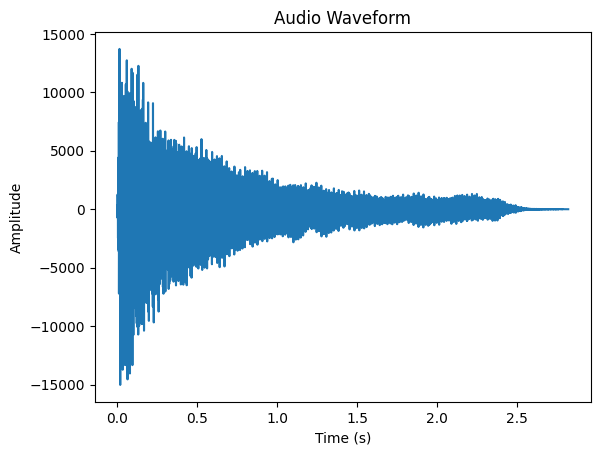

In [17]:
# Time domain Plot
time = np.arange(len(audio_data)) / sample_rate  # Create time axis
plt.plot(time, audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

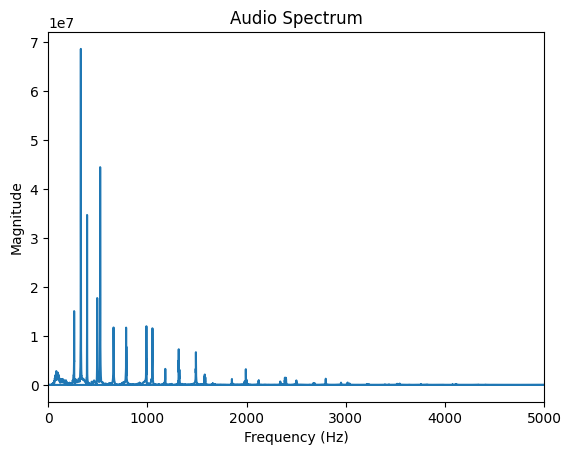

In [19]:
# Frequency Domain Plot

plt.plot(fft_freq, abs(fft_result)**2)  # Plot absolute values of frequency components
plt.xlim(0, 5000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Audio Spectrum")
plt.show()